---
#**1.  Data Cleaning / Data Preprocessing**

---


---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import warnings
import os
warnings.filterwarnings('ignore')

In [ ]:
# Configuration des graphiques
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

sns.set_palette("husl")

In [ ]:
import pandas as pd

# Chemin relatif depuis le dossier racine du projet
df = pd.read_csv("/content/noisy_paddydataset.csv")


print("="*60)
print("APERÇU GÉNÉRAL DU DATASET")
print("="*60)
print(f"Dimensions du dataset: {df.shape}")
print(f"Nombre total de cellules: {df.shape[0] * df.shape[1]:,}")
print(df.head())
print("="*60)
print("APERÇU GÉNÉRAL DU DATASET")
print("="*60)
print(f"Dimensions du dataset: {df.shape}")
print(f"Nombre total de cellules: {df.shape[0] * df.shape[1]:,}")

APERÇU GÉNÉRAL DU DATASET
Dimensions du dataset: (2789, 45)
Nombre total de cellules: 125,505
   Hectares      Agriblock      Variety Soil Types  Seedrate(in Kg)  \
0        6.0     Cuddalore        CO_43   alluvial            150.0   
1        6.0   Kurinjipadi      ponmani       CLAY            150.0   
2        6.0           NaN  delux ponni   alluvial            150.0   
3        6.0  Kallakurichi        CO_43       clay            150.0   
4        NaN  Sankarapuram      ponmani   ALLUVIAL            150.0   

   LP_Mainfield(in Tonnes) Nursery  Nursery area (Cents)  \
0                     75.0     dry                 120.0   
1                     75.0     wet                 120.0   
2                     75.0     NaN                 120.0   
3                     75.0     WET                 120.0   
4                     75.0     dry                 120.0   

   LP_nurseryarea(in Tonnes)  DAP_20days  ...  Wind Direction_D1_D30  \
0                        6.0       240.0  ... 

In [ ]:
# Informations générales
print("INFORMATIONS GÉNÉRALES:")
print("-" * 30)
df.info()
print()

INFORMATIONS GÉNÉRALES:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hectares                            2587 non-null   float64
 1   Agriblock                           2558 non-null   object 
 2   Variety                             2572 non-null   object 
 3   Soil Types                          2567 non-null   object 
 4   Seedrate(in Kg)                     2552 non-null   float64
 5   LP_Mainfield(in Tonnes)             2577 non-null   float64
 6   Nursery                             2573 non-null   object 
 7   Nursery area (Cents)                2557 non-null   float64
 8   LP_nurseryarea(in Tonnes)           2576 non-null   float64
 9   DAP_20days                          2560 non-null   float64
 10  Weed28D_thiobencarb                 2563 non-null   f

In [ ]:
# Statistiques descriptives de base
print("STATISTIQUES DESCRIPTIVES - VARIABLES NUMÉRIQUES:")
print("-" * 50)
print(df.describe())

STATISTIQUES DESCRIPTIVES - VARIABLES NUMÉRIQUES:
--------------------------------------------------
         Hectares   Seedrate(in Kg)  LP_Mainfield(in Tonnes)  \
count  2587.000000      2552.000000              2577.000000   
mean      3.719366        93.015282                46.478463   
std       1.437034        35.884262                17.966061   
min       1.000000        25.000000                12.500000   
25%       3.000000        75.000000                37.500000   
50%       4.000000       100.000000                50.000000   
75%       5.000000       125.000000                62.500000   
max       6.000000       150.000000                75.000000   

       Nursery area (Cents)  LP_nurseryarea(in Tonnes)   DAP_20days  \
count           2557.000000                2576.000000  2560.000000   
mean              74.243254                   3.720109   149.265625   
std               28.767460                   1.440496    57.536435   
min               20.000000           

In [ ]:
# ----------------------------------------------------------------
# 3. DISTINCTION VARIABLES NUMÉRIQUES ET CATÉGORIQUES
# ----------------------------------------------------------------

print("\n" + "-"*70)
print("DISTINCTION VARIABLES NUMÉRIQUES ET CATÉGORIQUES")
print("-"*70)

# Identification des types de variables
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"Variables numériques: {len(numeric_features)}")
print(f"  Exemples: {numeric_features[:10]}")
print(f"\nVariables catégoriques: {len(categorical_features)}")
print(f"  Exemples: {categorical_features[:10]}")


----------------------------------------------------------------------
DISTINCTION VARIABLES NUMÉRIQUES ET CATÉGORIQUES
----------------------------------------------------------------------
Variables numériques: 37
  Exemples: ['Hectares ', 'Seedrate(in Kg)', 'LP_Mainfield(in Tonnes)', 'Nursery area (Cents)', 'LP_nurseryarea(in Tonnes)', 'DAP_20days', 'Weed28D_thiobencarb', 'Urea_40Days', 'Potassh_50Days', 'Micronutrients_70Days']

Variables catégoriques: 8
  Exemples: ['Agriblock', 'Variety', 'Soil Types', 'Nursery', 'Wind Direction_D1_D30', 'Wind Direction_D31_D60', 'Wind Direction_D61_D90', 'Wind Direction_D91_D120']


In [ ]:
# ================================================================
# 2. ANALYSE DES DONNÉES MANQUANTES
# ================================================================

print("\n" + "="*60)
print("ANALYSE DES DONNÉES MANQUANTES")
print("="*60)


ANALYSE DES DONNÉES MANQUANTES


In [ ]:
# Calcul des valeurs manquantes
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Colonnes': missing_data.index,
    'Valeurs_Manquantes': missing_data.values,
    'Pourcentage': missing_percent.values
}).sort_values('Pourcentage', ascending=False)

In [ ]:
# Affichage des colonnes avec des valeurs manquantes
missing_cols = missing_df[missing_df['Valeurs_Manquantes'] > 0]
print(f"Nombre de colonnes avec des valeurs manquantes: {len(missing_cols)}")
print("\nColonnes avec le plus de valeurs manquantes:")
print(missing_cols.head(10))

Nombre de colonnes avec des valeurs manquantes: 45

Colonnes avec le plus de valeurs manquantes:
                             Colonnes  Valeurs_Manquantes  Pourcentage
37             Wind Direction_D61_D90                 257     9.214772
39           Relative Humidity_D1_D30                 252     9.035497
36             Wind Direction_D31_D60                 248     8.892076
31   Inst Wind Speed_D1_D30(in Knots)                 247     8.856221
32  Inst Wind Speed_D31_D60(in Knots)                 241     8.641090
35              Wind Direction_D1_D30                 239     8.569380
38            Wind Direction_D91_D120                 237     8.497669
4                     Seedrate(in Kg)                 237     8.497669
28                   Max temp_D61_D90                 236     8.461814
42         Relative Humidity_D91_D120                 235     8.425959


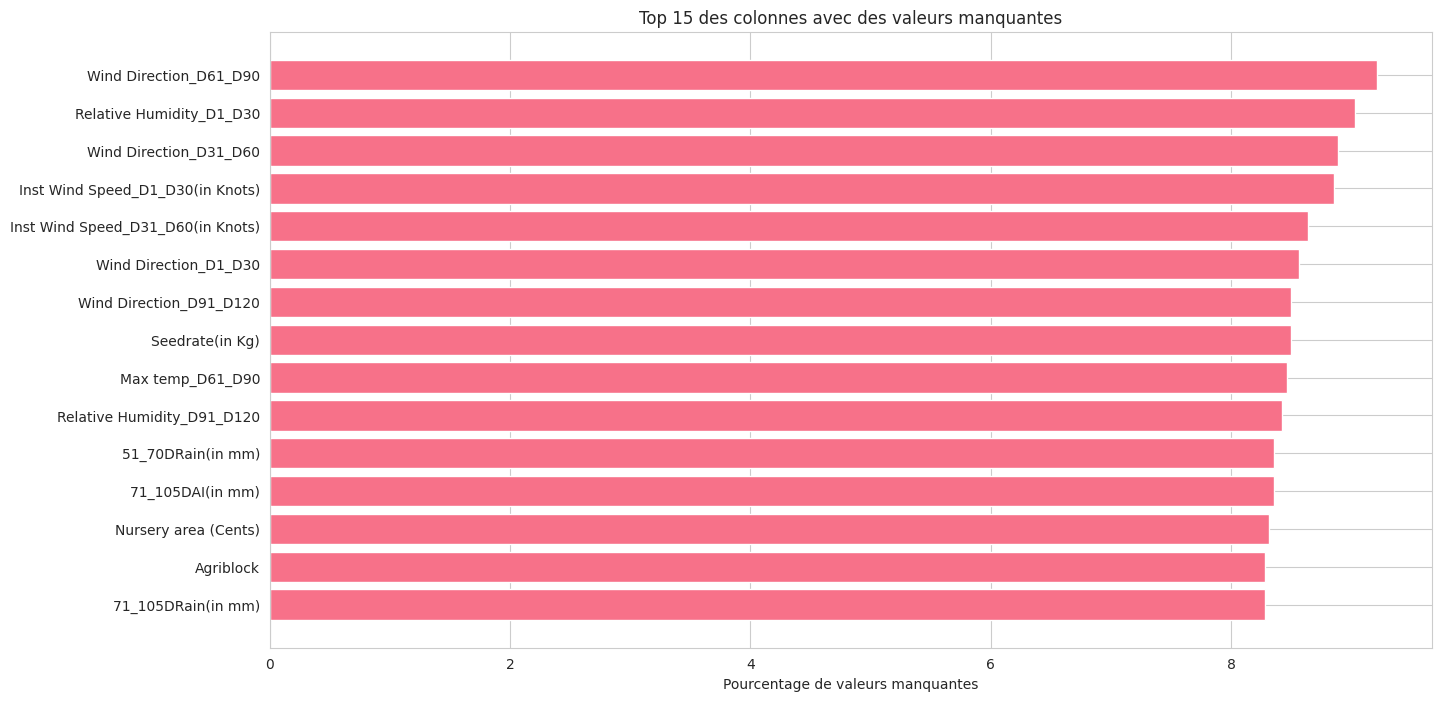

In [ ]:
# Visualisation des données manquantes
plt.figure(figsize=(15, 8))
missing_cols_top = missing_cols.head(15)
plt.barh(missing_cols_top['Colonnes'], missing_cols_top['Pourcentage'])
plt.xlabel('Pourcentage de valeurs manquantes')
plt.title('Top 15 des colonnes avec des valeurs manquantes')
plt.gca().invert_yaxis()


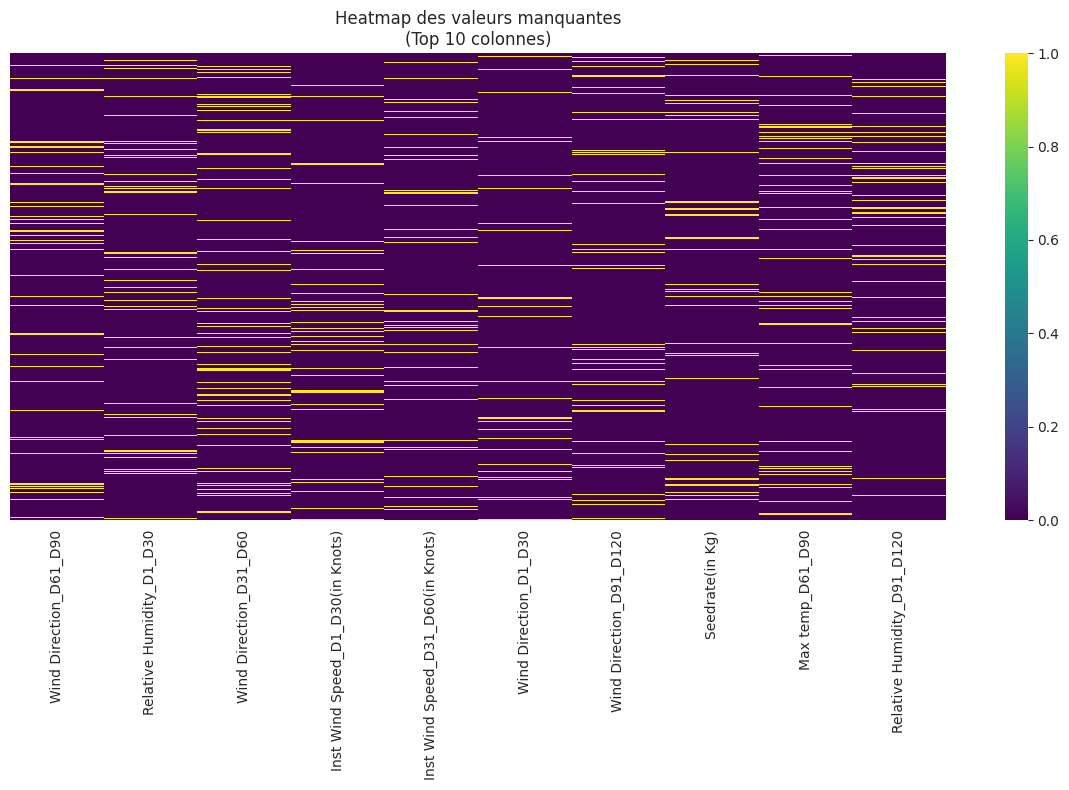

In [ ]:
# Heatmap des valeurs manquantes (échantillon)
sample_cols = missing_cols.head(10)['Colonnes'].tolist()
if sample_cols:
    sns.heatmap(df[sample_cols].isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Heatmap des valeurs manquantes\n(Top 10 colonnes)')
plt.tight_layout()
plt.show()

2.1 Visualisation : Histogrammes avec Mean & Median

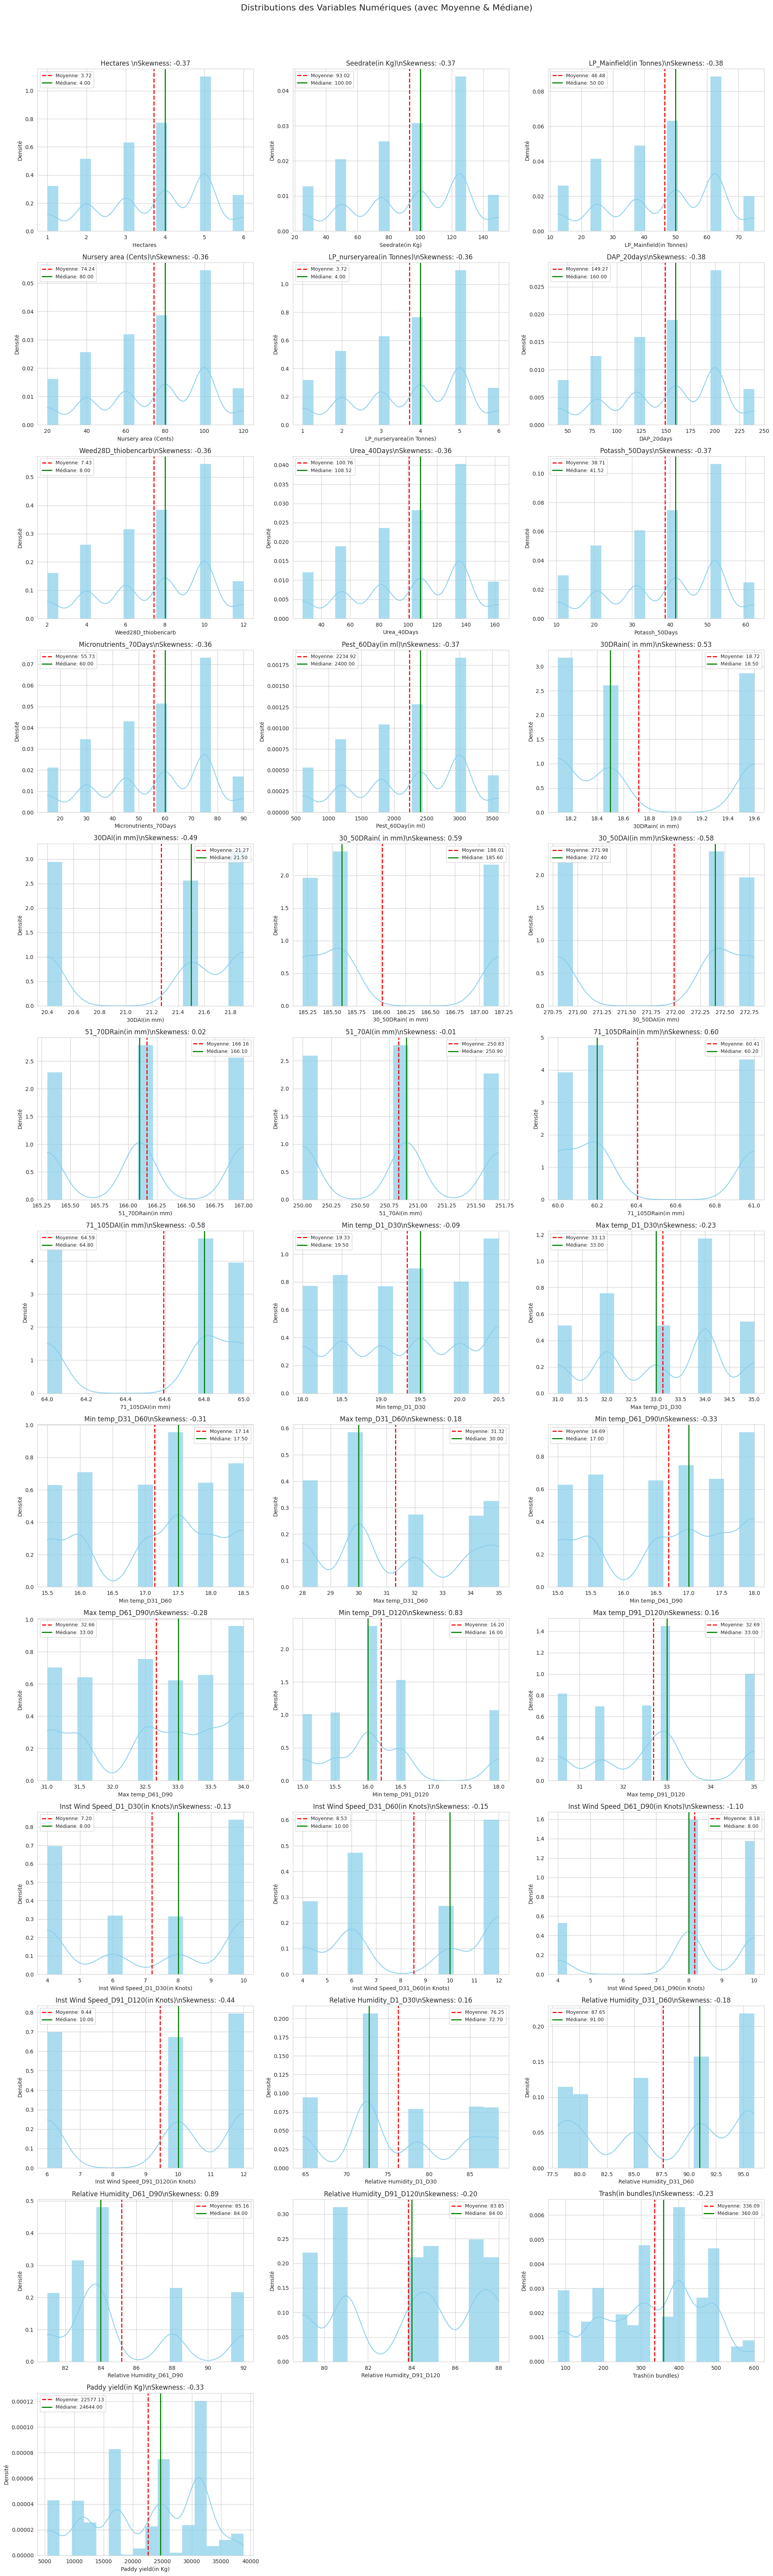

In [ ]:
# Créer une grille d'histogrammes (max 3 par ligne)
n_cols = 3
n_rows = (len(numeric_features) + n_cols - 1) // n_cols

plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    data = df[col].dropna()

    sns.histplot(data, kde=True, stat="density", alpha=0.7, color='skyblue', linewidth=0)

    mean_val = data.mean()
    median_val = data.median()

    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Médiane: {median_val:.2f}')

    skewness = stats.skew(data)
    plt.title(f'{col}\\nSkewness: {skewness:.2f}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Densité')
    plt.legend(fontsize=9)

plt.tight_layout()
plt.suptitle('Distributions des Variables Numériques (avec Moyenne & Médiane)', fontsize=16, y=1.02)
plt.show()

2.2 Tests Statistiques & Suggestion d'Imputation

In [ ]:
# Analyse statistique pour chaque colonne numérique
imputation_suggestions = []

for col in numeric_features:
    data = df[col].dropna()
    n = len(data)

    if n < 3:
        continue  # Pas assez de données pour les tests

    mean = data.mean()
    median = data.median()
    skewness = stats.skew(data)
    kurt = stats.kurtosis(data)

    # Test de normalité selon taille d'échantillon
    if n <= 500:
        # Shapiro-Wilk (p-value > 0.05 → normal)
        shapiro_stat, shapiro_p = stats.shapiro(data)
        test_name = 'Shapiro-Wilk'
        p_value = shapiro_p
    elif n <= 5000:
        # Kolmogorov-Smirnov (données standardisées)
        standardized_data = (data - mean) / data.std()
        ks_stat, ks_p = stats.kstest(standardized_data, 'norm')
        test_name = 'Kolmogorov-Smirnov'
        p_value = ks_p
    else:
        # Trop grand dataset → on se fie à skewness
        p_value = np.nan
        test_name = 'N/A'

    # Décision d'imputation
    if abs(skewness) <= 0.5 and (np.isnan(p_value) or p_value > 0.05):
        imputation = "Moyenne (distribution symétrique et normale)"
    else:
        imputation = "Médiane (distribution asymétrique ou non normale)"

    imputation_suggestions.append({
        'Colonne': col,
        'Moyenne': round(mean, 2),
        'Médiane': round(median, 2),
        'Skewness': round(skewness, 3),
        'Test Normalité': test_name,
        'p-value': round(p_value, 4) if not np.isnan(p_value) else 'N/A',
        'Suggestion Imputation': imputation
    })

# Affichage des résultats
results_df = pd.DataFrame(imputation_suggestions)
results_df = results_df.sort_values(by='Skewness', key=abs, ascending=False)

print("RÉSUMÉ STATISTIQUE ET SUGGESTIONS D'IMPUTATION")
print("="*80)
print(results_df.to_string(index=False))

RÉSUMÉ STATISTIQUE ET SUGGESTIONS D'IMPUTATION
                           Colonne  Moyenne  Médiane  Skewness     Test Normalité  p-value                             Suggestion Imputation
 Inst Wind Speed_D61_D90(in Knots)     8.18     8.00    -1.101 Kolmogorov-Smirnov      0.0 Médiane (distribution asymétrique ou non normale)
         Relative Humidity_D61_D90    85.16    84.00     0.887 Kolmogorov-Smirnov      0.0 Médiane (distribution asymétrique ou non normale)
                 Min temp_D91_D120    16.20    16.00     0.827 Kolmogorov-Smirnov      0.0 Médiane (distribution asymétrique ou non normale)
                71_105DRain(in mm)    60.41    60.20     0.598 Kolmogorov-Smirnov      0.0 Médiane (distribution asymétrique ou non normale)
                30_50DRain( in mm)   186.01   185.60     0.592 Kolmogorov-Smirnov      0.0 Médiane (distribution asymétrique ou non normale)
                   30_50DAI(in mm)   271.98   272.40    -0.580 Kolmogorov-Smirnov      0.0 Médiane (distrib

2.3 Application de l'Imputation Recommandée

In [ ]:
df_cleaned = df.copy()
# Imputation automatique selon les suggestions
for col in numeric_features:
    data = df_cleaned[col]
    if data.isnull().sum() == 0:
        continue  # Rien à imputer

    # Récupérer la suggestion
    suggestion = results_df.loc[results_df['Colonne'] == col, 'Suggestion Imputation'].values[0]

    if "Moyenne" in suggestion:
        df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)
        print(f"{col} : imputé par la MOYENNE")
    else:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
        print(f"{col} : imputé par la MÉDIANE")

# Vérification finale
print(f"\nValeurs manquantes restantes (numériques) : {df_cleaned[numeric_features].isnull().sum().sum()}")

Hectares  : imputé par la MÉDIANE
Seedrate(in Kg) : imputé par la MÉDIANE
LP_Mainfield(in Tonnes) : imputé par la MÉDIANE
Nursery area (Cents) : imputé par la MÉDIANE
LP_nurseryarea(in Tonnes) : imputé par la MÉDIANE
DAP_20days : imputé par la MÉDIANE
Weed28D_thiobencarb : imputé par la MÉDIANE
Urea_40Days : imputé par la MÉDIANE
Potassh_50Days : imputé par la MÉDIANE
Micronutrients_70Days : imputé par la MÉDIANE
Pest_60Day(in ml) : imputé par la MÉDIANE
30DRain( in mm) : imputé par la MÉDIANE
30DAI(in mm) : imputé par la MÉDIANE
30_50DRain( in mm) : imputé par la MÉDIANE
30_50DAI(in mm) : imputé par la MÉDIANE
51_70DRain(in mm) : imputé par la MÉDIANE
51_70AI(in mm) : imputé par la MÉDIANE
71_105DRain(in mm) : imputé par la MÉDIANE
71_105DAI(in mm) : imputé par la MÉDIANE
Min temp_D1_D30 : imputé par la MÉDIANE
Max temp_D1_D30 : imputé par la MÉDIANE
Min temp_D31_D60 : imputé par la MÉDIANE
Max temp_D31_D60 : imputé par la MÉDIANE
Min temp_D61_D90 : imputé par la MÉDIANE
Max temp_D61_

2.4 Détection des Outliers

In [ ]:
# Après imputation des valeurs aberrantes
from scipy.stats.mstats import winsorize

def auto_treat_outliers(df, numeric_features, min_rows_threshold=5000, plot=True):
    """
    Traite automatiquement les outliers en choisissant la méthode la plus adéquate.

    Critères de décision :
    - Si très peu d'outliers (<1%) et dataset grand → Suppression possible
    - Si skewness > 1 et valeurs >=0 → Transformation log
    - Si % outliers > 5% → Capping percentiles 5%/95%
    - Sinon → Robust IQR + remplacement par médiane
    """

    summary = []
    rows_to_drop = set()
    initial_rows = len(df)

    # Sauvegarde des données AVANT traitement (pour visualisation)
    df_before = df.copy()

    print("TRAITEMENT AUTOMATIQUE DES OUTLIERS - CHOIX INTELLIGENT PAR COLONNE")
    print("=" * 100)

    # ============================
    # TRAITEMENT COLONNE PAR COLONNE
    # ============================
    for col in numeric_features:
        data = df[col].dropna()

        if len(data) < 10:
            summary.append({
                'Colonne': col,
                'Méthode Choisie': 'Ignoré (trop peu de données)'
            })
            continue

        # Statistiques
        skewness = stats.skew(data)
        median = data.median()

        # Détection IQR
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outlier_mask = (df[col] < lower) | (df[col] > upper)
        nb_outliers = outlier_mask.sum()
        percent_outliers = nb_outliers / len(df) * 100

        method_chosen = ""
        action = ""

        # ============================
        # DÉCISION AUTOMATIQUE
        # ============================
        if nb_outliers == 0:
            method_chosen = "Aucun outlier"
            action = "Rien à faire"

        elif percent_outliers < 1 and len(df) > min_rows_threshold:
            rows_to_drop.update(df.loc[outlier_mask].index)
            method_chosen = "Suppression"
            action = f"{nb_outliers} lignes supprimées"

        elif abs(skewness) > 1 and data.min() >= 0:
            df[col + "_log"] = np.log1p(df[col])
            method_chosen = "Transformation log"
            action = "Nouvelle colonne _log créée"

        elif percent_outliers > 5:
            df[col] = winsorize(df[col], limits=[0.05, 0.05])
            method_chosen = "Capping (5%/95%)"
            action = "Winsorization appliquée"

        else:
            df.loc[outlier_mask, col] = median
            method_chosen = "Robust IQR + médiane"
            action = f"{nb_outliers} outliers remplacés par médiane"

        summary.append({
            'Colonne': col,
            'Skewness': round(skewness, 3),
            '% Outliers': round(percent_outliers, 2),
            'Méthode Choisie': method_chosen,
            'Action': action
        })

    # ============================
    # SUPPRESSION FINALE (UNE FOIS)
    # ============================
    if rows_to_drop:
        df.drop(index=list(rows_to_drop), inplace=True)
        df.reset_index(drop=True, inplace=True)
        df_before = df_before.loc[df.index].reset_index(drop=True)

    # ============================
    # VISUALISATION AVANT / APRÈS
    # ============================
    if plot:
        fig, axes = plt.subplots(
            nrows=len(numeric_features),
            ncols=2,
            figsize=(14, 4 * len(numeric_features))
        )

        if len(numeric_features) == 1:
            axes = np.array([axes])

        for i, col in enumerate(numeric_features):
            sns.boxplot(
                y=df_before[col],
                ax=axes[i, 0],
                color='lightcoral'
            )
            axes[i, 0].set_title(f'Avant - {col}')

            sns.boxplot(
                y=df[col],
                ax=axes[i, 1],
                color='lightgreen'
            )
            axes[i, 1].set_title(f'Après - {col}')

        plt.suptitle("Comparaison AVANT / APRÈS par colonne", fontsize=16)
        plt.tight_layout()
        plt.show()

    # ============================
    # RÉCAPITULATIF
    # ============================
    final_rows = len(df)
    print(f"\nNombre de lignes : {initial_rows} → {final_rows}")

    summary_df = pd.DataFrame(summary)
    print("\nRÉCAPITULATIF DU TRAITEMENT AUTOMATIQUE")
    print(summary_df.to_string(index=False))

    return df, summary_df

TRAITEMENT AUTOMATIQUE DES OUTLIERS - CHOIX INTELLIGENT PAR COLONNE


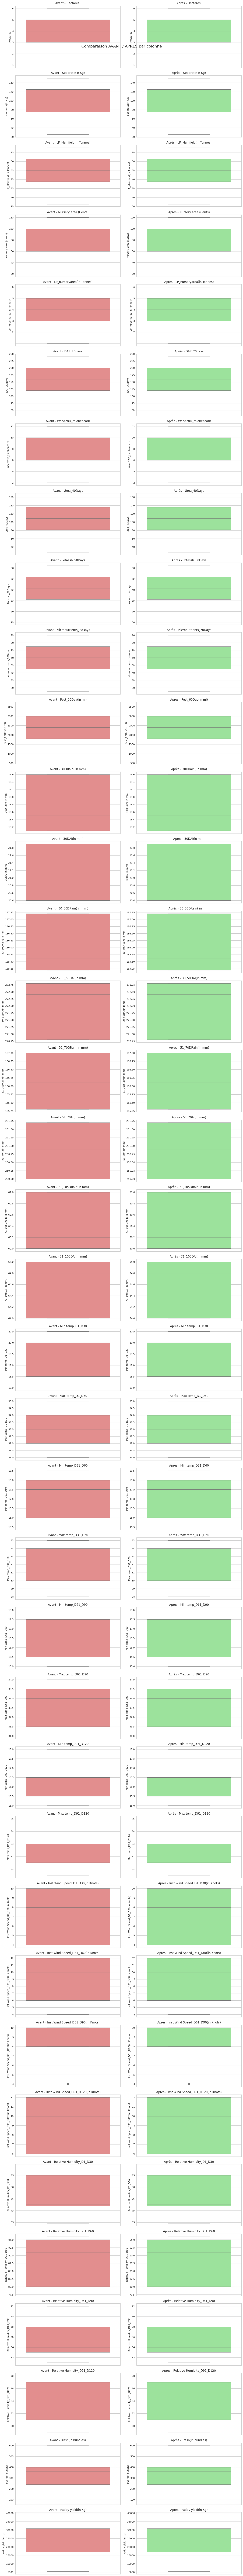


Nombre de lignes : 2789 → 2789

RÉCAPITULATIF DU TRAITEMENT AUTOMATIQUE
                           Colonne  Skewness  % Outliers    Méthode Choisie                      Action
                         Hectares     -0.424        0.00      Aucun outlier                Rien à faire
                   Seedrate(in Kg)    -0.432        0.00      Aucun outlier                Rien à faire
           LP_Mainfield(in Tonnes)    -0.439        0.00      Aucun outlier                Rien à faire
              Nursery area (Cents)    -0.426        0.00      Aucun outlier                Rien à faire
         LP_nurseryarea(in Tonnes)    -0.418        0.00      Aucun outlier                Rien à faire
                        DAP_20days    -0.445        0.00      Aucun outlier                Rien à faire
               Weed28D_thiobencarb    -0.421        0.00      Aucun outlier                Rien à faire
                       Urea_40Days    -0.417        0.00      Aucun outlier                Rien

,Hectares,Agriblock,Variety,Soil Types,Seedrate(in Kg),LP_Mainfield(in Tonnes),Nursery,Nursery area (Cents),LP_nurseryarea(in Tonnes),DAP_20days,...,Wind Direction_D31_D60,Wind Direction_D61_D90,Wind Direction_D91_D120,Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy yield(in Kg),Inst Wind Speed_D61_D90(in Knots)_log
0,6.0,Cuddalore,CO_43,alluvial,150.0,75.0,dry,120.0,6.0,240.0,...,W,NNW,WSW,72.0,78.0,88.0,85.0,540.0,35028.0,2.197225
1,6.0,Kurinjipadi,ponmani,CLAY,150.0,75.0,wet,120.0,6.0,240.0,...,S,SE,SSE,64.6,85.0,84.0,87.0,600.0,35412.0,2.397895
2,6.0,NaN,delux ponni,alluvial,150.0,75.0,NaN,120.0,6.0,240.0,...,NE,NNE,W,85.0,96.0,84.0,79.0,600.0,36300.0,1.609438
3,6.0,Kallakurichi,CO_43,clay,150.0,75.0,WET,120.0,6.0,240.0,...,WNW,SE,NaN,88.5,95.0,81.0,84.0,540.0,35016.0,2.197225
4,4.0,Sankarapuram,ponmani,ALLUVIAL,150.0,75.0,dry,120.0,6.0,240.0,...,W,SW,NW,72.7,91.0,83.0,81.0,600.0,34044.0,2.397895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,1.0,Kallakurichi,CO_43,alluvial,25.0,12.5,WET,20.0,1.0,40.0,...,WNW,SE,S,88.5,91.0,81.0,84.0,90.0,5836.0,2.197225
2785,1.0,Sankarapuram,ponmani,clay,25.0,12.5,wet,20.0,1.0,40.0,...,W,SW,NW,72.7,91.0,83.0,81.0,100.0,5723.0,2.397895
2786,1.0,Chinnasalem,delux ponni,clay,25.0,12.5,wet,20.0,1.0,40.0,...,ENE,NE,NNW,78.6,80.0,92.0,88.0,80.0,5723.0,2.197225
2787,1.0,NaN,CO_43,ALLUVIAL,25.0,12.5,wet,20.0,1.0,40.0,...,NaN,NaN,WSW,72.7,78.0,88.0,85.0,90.0,5916.0,2.197225


In [ ]:
df_cleaned, recap = auto_treat_outliers(df_cleaned, numeric_features, plot=True)


print("\n=== DATAFRAME APRÈS TRAITEMENT ===")
display(df_cleaned)

In [ ]:
print("\n=== RÉCAPITULATIF ===")
display(recap)


=== RÉCAPITULATIF ===


,Colonne,Skewness,% Outliers,Méthode Choisie,Action
0,Hectares,-0.424,0.00,Aucun outlier,Rien à faire
1,Seedrate(in Kg),-0.432,0.00,Aucun outlier,Rien à faire
2,LP_Mainfield(in Tonnes),-0.439,0.00,Aucun outlier,Rien à faire
3,Nursery area (Cents),-0.426,0.00,Aucun outlier,Rien à faire
4,LP_nurseryarea(in Tonnes),-0.418,0.00,Aucun outlier,Rien à faire
5,DAP_20days,-0.445,0.00,Aucun outlier,Rien à faire
6,Weed28D_thiobencarb,-0.421,0.00,Aucun outlier,Rien à faire
7,Urea_40Days,-0.417,0.00,Aucun outlier,Rien à faire
8,Potassh_50Days,-0.423,0.00,Aucun outlier,Rien à faire
9,Micronutrients_70Days,-0.423,0.00,Aucun outlier,Rien à faire


In [ ]:
# ===================================================================
# 2.5 Imputation + Uniformisation des Variables Catégorielles
# ===================================================================

print("ÉTAT AVANT TRAITEMENT")
print("="*80)
for col in categorical_features:
    if col in df_cleaned.columns:
        missing = df_cleaned[col].isnull().sum()
        uniques = df_cleaned[col].nunique()
        print(f"{col:30} → {missing:3} valeurs manquantes | {uniques} valeurs uniques")

print("\n" + "="*80)
print("TRAITEMENT : IMPUTATION (mode) + UNIFORMISATION (minuscules + strip)")
print("="*80)

treatment_summary = []

for col in categorical_features:
    if col not in df_cleaned.columns:
        print(f"{col} : colonne non présente")
        continue

    initial_missing = df_cleaned[col].isnull().sum()
    initial_unique = df_cleaned[col].nunique()

    # 1. Imputation des valeurs manquantes par le mode
    if initial_missing > 0:
        mode_value = df_cleaned[col].mode(dropna=True)[0]
        df_cleaned[col].fillna(mode_value, inplace=True)
        imputed = True
    else:
        mode_value = None
        imputed = False

    # 2. Uniformisation : minuscules + suppression espaces
    df_cleaned[col] = df_cleaned[col].astype(str).str.lower().str.strip()

    # Après traitement
    final_missing = df_cleaned[col].isnull().sum()
    final_unique = df_cleaned[col].nunique()

    print(f"✓ {col}")
    if imputed:
        print(f"   → {initial_missing} valeurs manquantes imputées par mode : '{mode_value}'")
    print(f"   → Valeurs uniques : {initial_unique} → {final_unique} (réduction des doublons de casse)")

    treatment_summary.append({
        'Colonne': col,
        'Manquantes Initiales': initial_missing,
        'Imputé par Mode': mode_value if imputed else 'Non',
        'Uniques Avant': initial_unique,
        'Uniques Après': final_unique
    })

# Vérification finale
print("\n" + "="*80)
print("VÉRIFICATION FINALE")
print("="*80)
total_missing_cat = df_cleaned[categorical_features].isnull().sum().sum()
print(f"Valeurs manquantes restantes (catégorielles) : {total_missing_cat} → doit être 0")

print("\nValeurs uniques finales par colonne :")
for col in categorical_features:
    if col in df_cleaned.columns:
        print(f"   {col:30} → {df_cleaned[col].nunique()} valeurs : {sorted(df_cleaned[col].unique())[:10]}...")

# Tableau récapitulatif
summary_df = pd.DataFrame(treatment_summary)
print("\nRÉCAPITULATIF DU TRAITEMENT")
print(summary_df.to_string(index=False))

ÉTAT AVANT TRAITEMENT
Agriblock                      → 231 valeurs manquantes | 12 valeurs uniques
Variety                        → 217 valeurs manquantes | 5 valeurs uniques
Soil Types                     → 222 valeurs manquantes | 4 valeurs uniques
Nursery                        → 216 valeurs manquantes | 4 valeurs uniques
Wind Direction_D1_D30          → 239 valeurs manquantes | 6 valeurs uniques
Wind Direction_D31_D60         → 248 valeurs manquantes | 5 valeurs uniques
Wind Direction_D61_D90         → 257 valeurs manquantes | 5 valeurs uniques
Wind Direction_D91_D120        → 237 valeurs manquantes | 6 valeurs uniques

TRAITEMENT : IMPUTATION (mode) + UNIFORMISATION (minuscules + strip)
✓ Agriblock
   → 231 valeurs manquantes imputées par mode : 'Sankarapuram'
   → Valeurs uniques : 12 → 6 (réduction des doublons de casse)
✓ Variety
   → 217 valeurs manquantes imputées par mode : 'ponmani'
   → Valeurs uniques : 5 → 3 (réduction des doublons de casse)
✓ Soil Types
   → 222 valeurs

In [ ]:
# Créer le dossier data s'il n'existe pas
os.makedirs("data", exist_ok=True)
# Enregistrement en CSV
df_cleaned.to_csv("data/cleaned_paddydataset.csv", index=False)

print("\nDataFrame sauvegardé dans : data/cleaned_paddydataset.csv")


DataFrame sauvegardé dans : data/cleaned_paddydataset.csv
